# Sentiment Analysis 

In [2]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [63]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
tweets_df = pd.read_csv('AirlineTweets.csv')
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
tweets_df = tweets_df[["airline_sentiment","text"]].copy()
tweets_df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: xlabel='airline_sentiment', ylabel='count'>

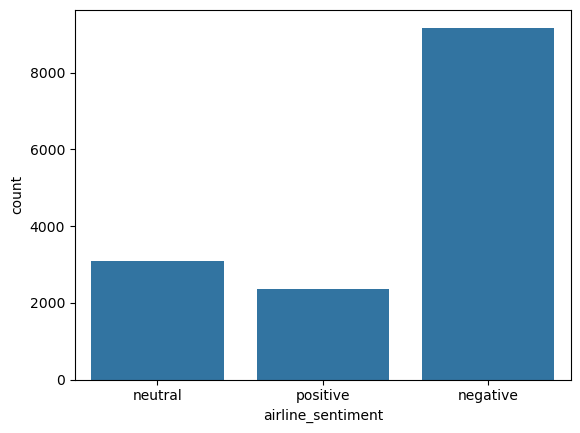

In [11]:
# check for class imbalance 
sns.countplot(tweets_df,x="airline_sentiment")

In [13]:
tweets_df["text"][0]

'@VirginAmerica What @dhepburn said.'

In [19]:
tweets_df["target"] = tweets_df["airline_sentiment"].map({
    "positive":1 ,"negative":0,"neutral":2
    
})

In [21]:
tweets_df.head(3)

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2


In [22]:
# split of the data 
X_train, X_test, y_train, y_test = train_test_split(tweets_df["text"],tweets_df['target'])

In [23]:
X_train

13369    @AmericanAir please confirm 2917 from CID-DFW ...
7823     @JetBlue so yesterday a flight I wanted to Chi...
6807     @JetBlue you all are the best #flyfi # ondeman...
89       @VirginAmerica Why is the site down?  When wil...
7549     @JetBlue flight 16 now sent back to the gate e...
                               ...                        
11399    @USAirways I spent more on the room &amp; tran...
6612     @SouthwestAir RDU flights expected to be ok th...
8317                                       @JetBlue thanks
9904     @usairways @AmericanAir LAX connect from term ...
8543     @JetBlue glad u happy I have my bag but as a t...
Name: text, Length: 10980, dtype: object

In [ ]:
y_train

13369    2
7823     2
6807     1
89       0
7549     0
        ..
11399    0
6612     2
8317     1
9904     0
8543     0
Name: target, Length: 10980, dtype: int64

In [45]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
X_train_Vector = vectorizer.fit_transform(X_train)
X_test_Vector = vectorizer.transform(X_test)
len(vectorizer.get_feature_names_out())

5000

In [46]:
vectorizer.vocabulary_

{'americanair': 521,
 'confirm': 1250,
 'dfw': 1528,
 '11': 25,
 '30': 157,
 'departure': 1492,
 'cancelled': 989,
 'flighted': 1971,
 'don': 1611,
 'want': 4824,
 'make': 2871,
 'hour': 2388,
 'drive': 1634,
 'jetblue': 2591,
 'yesterday': 4976,
 'flight': 1966,
 'wanted': 4825,
 'chicago': 1082,
 'sale': 3942,
 'points': 3465,
 'range': 3637,
 'today': 4549,
 'isn': 2547,
 'way': 4843,
 'guys': 2226,
 'honor': 2358,
 'best': 789,
 'flyfi': 1999,
 'legroom': 2719,
 'virginamerica': 4791,
 'site': 4134,
 '16': 66,
 'sent': 4037,
 'gate': 2114,
 'app': 569,
 'says': 3971,
 'leaving': 2715,
 'clue': 1153,
 '36': 183,
 'sunny': 4368,
 'jfk': 2599,
 'united': 4711,
 'wifi': 4885,
 'just': 2626,
 'tell': 4463,
 'family': 1867,
 'gonna': 2162,
 'late': 2692,
 'cause': 1025,
 'sit': 4133,
 'grounded': 2205,
 'plane': 3432,
 'past': 3337,
 'hours': 2389,
 'good': 2163,
 'home': 2350,
 'southwestair': 4221,
 'literally': 2763,
 'worst': 4931,
 'phone': 3395,
 'reservations': 3817,
 'team': 4451

In [47]:
X_train_Vector.shape

(10980, 5000)

In [ ]:
clf = LogisticRegression(max_iter=500)
clf.fit(X_train_Vector, y_train)
print("Accuracy Of Train Data:",clf.score(X_train_Vector,y_train))
print("Accuracy Of Test Data:",clf.score(X_test_Vector,y_test))

Accuracy Of Train Data: 0.8603825136612022
Accuracy Of Test Data: 0.780327868852459


In [55]:
print("AUC Of Train Data:",roc_auc_score(y_train, clf.predict_proba(X_train_Vector), multi_class='ovr'))
print("AUC Of Test Data:",roc_auc_score(y_test, clf.predict_proba(X_test_Vector), multi_class='ovr'))

AUC Of Train Data: 0.9573270074094177
AUC Of Test Data: 0.8931657014081429


In [ ]:
y_pred = clf.predict(X_test_Vector)
confusion_matrix(y_test,y_pred)


array([[2135,   35,  116],
       [ 155,  370,   89],
       [ 362,   47,  351]])

In [59]:
f1_score(y_test,y_pred,average='weighted')

0.7673210379705196

In [62]:
clf = LogisticRegression(max_iter=500,multi_class='multinomial',solver='lbfgs')
clf.fit(X_train_Vector, y_train)
print("Accuracy Of Train Data:",clf.score(X_train_Vector,y_train))
print("Accuracy Of Test Data:",clf.score(X_test_Vector,y_test))

Accuracy Of Train Data: 0.8603825136612022
Accuracy Of Test Data: 0.780327868852459


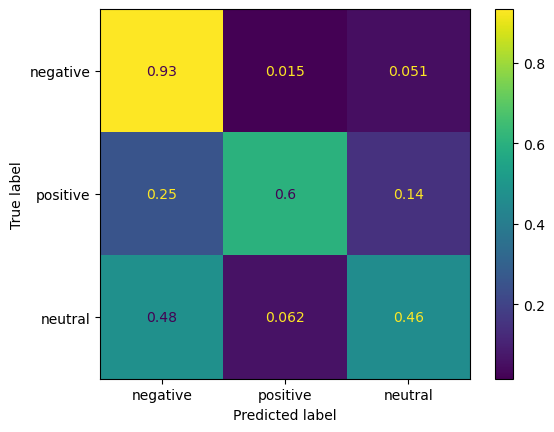

[[0.93394576 0.01531059 0.05074366]
 [0.252443   0.60260586 0.14495114]
 [0.47631579 0.06184211 0.46184211]]


In [ ]:
cm =confusion_matrix(y_test,y_pred,normalize='true')
classes = ['negative',"positive","neutral"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot()
plt.show()
print(cm)

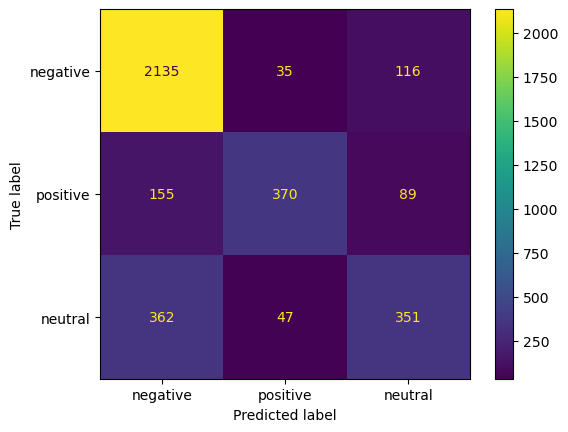

In [72]:
cm =confusion_matrix(y_test,y_pred)
classes = ['negative',"positive","neutral"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot()
plt.show()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2286
           1       0.82      0.60      0.69       614
           2       0.63      0.46      0.53       760

    accuracy                           0.78      3660
   macro avg       0.75      0.67      0.70      3660
weighted avg       0.77      0.78      0.77      3660



In [75]:
# using countVectorizer 
vectorizer = CountVectorizer(stop_words='english')
X_train_Vector = vectorizer.fit_transform(X_train)
X_test_Vector = vectorizer.transform(X_test)

In [76]:
clf = LogisticRegression(max_iter=500,multi_class='multinomial',solver='lbfgs')
clf.fit(X_train_Vector, y_train)
print("Accuracy Of Train Data:",clf.score(X_train_Vector,y_train))
print("Accuracy Of Test Data:",clf.score(X_test_Vector,y_test))

Accuracy Of Train Data: 0.9441712204007287
Accuracy Of Test Data: 0.7797814207650273


In [84]:
print("AUC Of Train Data:",roc_auc_score(y_train, clf.predict_proba(X_train_Vector), multi_class='ovo'))
print("AUC Of Test Data:",roc_auc_score(y_test, clf.predict_proba(X_test_Vector), multi_class='ovo'))

AUC Of Train Data: 0.9881195682314825
AUC Of Test Data: 0.8762895743773784


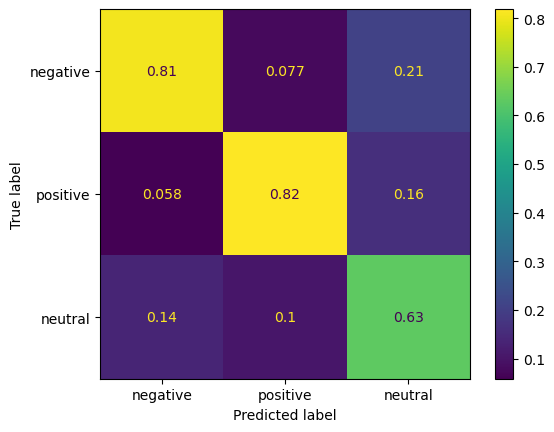

In [81]:
cm =confusion_matrix(y_test,y_pred,normalize='pred')
classes = ['negative',"positive","neutral"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot()
plt.show()

In [85]:
clf.classes_

array([0, 1, 2])

In [88]:
clf.coef_

array([[ 0.48218459,  0.12703899, -0.22687869, ..., -0.11060642,
         0.09335988,  0.1630029 ],
       [-0.08193238,  0.31506373, -0.03222226, ..., -0.13846914,
        -0.05864214, -0.09668191],
       [-0.40025222, -0.44210272,  0.25910095, ...,  0.24907555,
        -0.03471774, -0.06632099]])

In [92]:
pd.DataFrame(clf.coef_, columns=vectorizer.get_feature_names_out())

,00,000,000114,000419,000lbs,0011,0016,00a,00am,00p,...,zrh,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj
0,0.482185,0.127039,-0.226879,0.357944,0.081093,-0.207512,0.051548,0.013432,0.097170,0.248932,...,0.001025,-0.063628,-0.006834,-0.025009,-0.155206,0.071377,0.297633,-0.110606,0.093360,0.163003
1,-0.081932,0.315064,-0.032222,-0.143444,-0.066991,-0.015394,-0.024677,-0.009523,-0.043127,-0.211085,...,-0.000181,-0.012702,-0.003880,-0.159061,-0.053678,-0.017279,-0.037850,-0.138469,-0.058642,-0.096682
2,-0.400252,-0.442103,0.259101,-0.214500,-0.014103,0.222906,-0.026871,-0.003909,-0.054043,-0.037846,...,-0.000844,0.076330,0.010714,0.184070,0.208884,-0.054098,-0.259782,0.249076,-0.034718,-0.066321


In [136]:
# In binary classification problem with five features the coef_ is give below 
# Model coefficients (coef_):
# [[-0.44074167  0.74871271  0.09276298  0.22524658  0.06677887]]

# feature 2 (index 1) have high value like 0.74812 this feature provide high weight to the predict the class positive (1)
# feature 1 (index 0) have hige native value -0.4407 this feature provide high weight to predict negative (0)

# the high postive value become 1
#  high negative value beocome zero in sigmoid activeation funcation 

